In [16]:
import pandas as pd
import numpy as np
import datetime as dt
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('../data/usgs_data_small.csv')
df.dropna(inplace=True)
df.head()

,time,longitude,latitude,depth,mag
31,1728-02-08 12:54:00,-70.979,42.842,0.0,4.0
146,1843-02-08 16:14:00,-61.170,16.730,40.0,8.5
179,1853-09-02 01:24:00,-120.800,36.250,10.0,6.3
222,1860-04-17 04:54:00,-120.950,36.350,10.0,6.0
225,1860-10-17 12:39:00,-70.100,47.500,10.0,6.1


In [18]:
df["time"] = df["time"].apply(lambda x: x[:7])
df

,time,longitude,latitude,depth,mag
31,1728-02,-70.9790,42.8420,0.000,4.00
146,1843-02,-61.1700,16.7300,40.000,8.50
179,1853-09,-120.8000,36.2500,10.000,6.30
222,1860-04,-120.9500,36.3500,10.000,6.00
225,1860-10,-70.1000,47.5000,10.000,6.10
...,...,...,...,...,...
4451672,2023-10,-179.0150,51.7300,10.980,1.22
4451673,2023-10,152.6996,-4.3429,65.434,4.90
4451674,2023-10,-152.6620,60.0999,109.400,1.90
4451675,2023-10,-175.3176,51.9028,75.100,2.10


In [19]:
time_cut = "1973-01"
df = df[df["time"] > time_cut]

In [20]:
df["time"].min(), df["time"].max()

('1973-02', '2023-10')

In [21]:
GEO_SPLIT = 1

In [22]:
df["latitude_disc"] = (df["latitude"] // GEO_SPLIT * GEO_SPLIT).astype(int)
df["longitude_disc"] = (df["longitude"] // GEO_SPLIT * GEO_SPLIT).astype(int)
df["pos"] = df["latitude_disc"].astype(str) + "_" + df["longitude_disc"].astype(str)
df["time"] = pd.to_datetime(df["time"])

In [23]:
def filter_regions(df: pd.DataFrame, threshold: int) -> pd.DataFrame:
    df_f = df[df["time"] <= df["time"].quantile(0.8)]
    df_agg = df_f.groupby(["pos"]).agg({"mag": "count"}).reset_index()
    tmp = df_agg.loc[df_agg["mag"] >= threshold, "pos"].values
    df = df[df["pos"].isin(tmp)]
    return df

In [24]:
n = 40

In [25]:
counts1 = []
counts2 = []
for th in np.linspace(1, n, n):
    df_filter = filter_regions(df.copy(deep=True), th)
    df_agg = df_filter.groupby(["pos"]).count().reset_index()
    counts1.append(len(df_agg))
    counts2.append(len(df_filter))

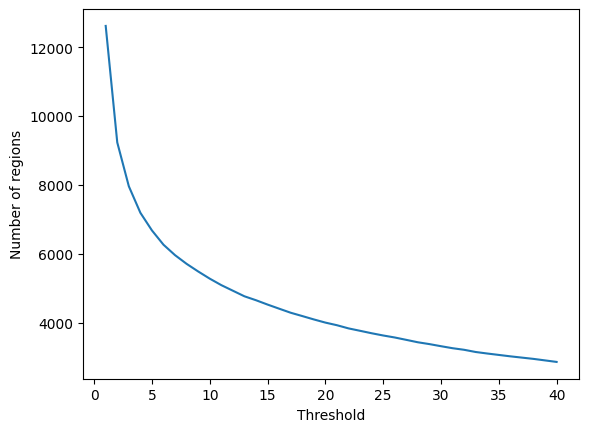

In [26]:
# plot counts
plt.plot(np.linspace(1, n, n), counts1)
plt.xlabel("Threshold")
plt.ylabel("Number of regions")
plt.show()

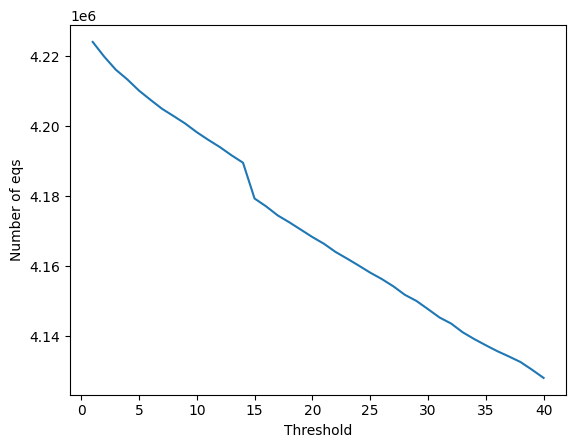

In [27]:
# plot counts
plt.plot(np.linspace(1, n, n), counts2)
plt.xlabel("Threshold")
plt.ylabel("Number of eqs")
plt.show()

In [28]:
n = 2000

In [29]:
counts1 = []
counts2 = []
for th in np.linspace(1, n+1, n // 5 + 1):
    df_filter = filter_regions(df.copy(deep=True), th)
    df_agg = df_filter.groupby(["pos"]).count().reset_index()
    counts1.append(len(df_agg))
    counts2.append(len(df_filter))

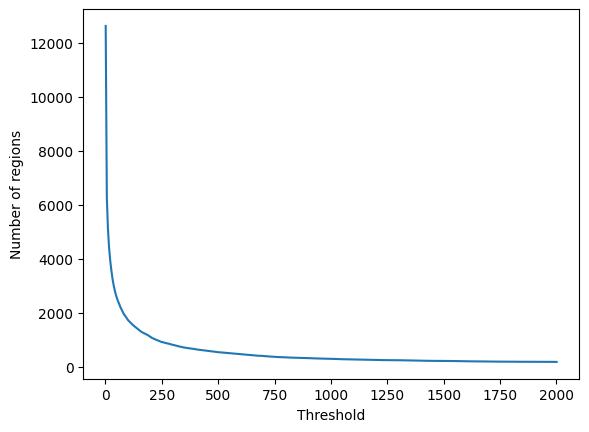

In [30]:
# plot counts
plt.plot(np.linspace(1, n+1, n // 5 + 1), counts1)
plt.xlabel("Threshold")
plt.ylabel("Number of regions")
plt.show()

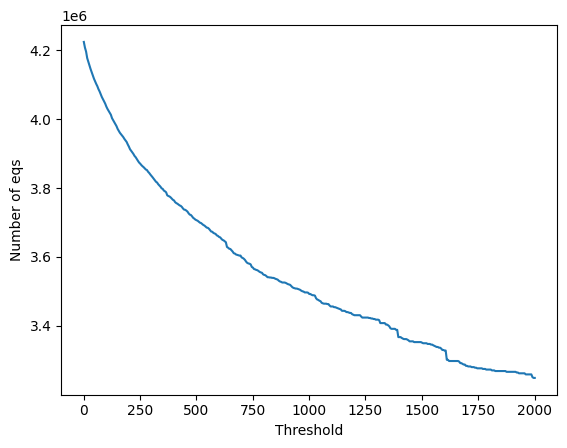

In [31]:
# plot counts
plt.plot(np.linspace(1, n+1, n // 5 + 1), counts2)
plt.xlabel("Threshold")
plt.ylabel("Number of eqs")
plt.show()